In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x9_plus_file = "/content/5min_x9_plus_data.TXT"
x9_file = '/content/X9_MOTOR_PERFORMENCE.TXT'

x9 = pd.read_csv(x9_file)
x9_plus = pd.read_csv(x9_plus_file)

In [ ]:
# removing the additional values and re indexing..
x9 = x9[-100:].reset_index(drop=True)
x9 = x9.drop(columns=[' RPM',' Voltage'])
x9_plus = x9_plus[-100:].reset_index(drop=True)
x9_plus = x9_plus.drop(columns=[' RPM',' Voltage'])

# Renaming Column names
x9 = x9.rename(columns={'Timestamp': 'Temp1', 'Temp 1': 'Temp2', 'Temp 2': 'Generator_Current',
                       ' Battery current': 'Battery Current', ' Generator current': 'servo angle',
                       ' servo angle': 'Voltage', ' Voltage': 'servo_angle'})
x9_plus = x9_plus.rename(columns={'Timestamp': 'Temp1', 'Temp 1': 'Temp2', 'Temp 2': 'Generator_Current',
                       ' Battery current': 'Battery Current', ' Generator current': 'servo angle',
                       ' servo angle': 'Voltage', ' Voltage': 'servo_angle'})

# Making into Int
cols = ['Temp1', 'Temp2', 'Battery Current', 'Generator_Current', 'servo angle','Voltage']
x9[cols] = x9[cols].apply(pd.to_numeric)
x9_plus[cols] = x9_plus[cols].apply(pd.to_numeric)

In [ ]:
#Product of Battery current and Voltage
x9['Battery_Product'] = x9['Battery Current'] * x9['Voltage']
x9_plus['Battery_Product'] = x9_plus['Battery Current'] * x9_plus['Voltage']

#Product of Generator current and Voltage
x9['Gen_Product'] = x9['Generator_Current'] * x9['Voltage']
x9_plus['Gen_Product'] = x9_plus['Generator_Current'] * x9_plus['Voltage']

# Sum of Generator current and Batter current
x9['consumption'] = x9['Gen_Product'] + x9['Battery_Product']
x9_plus['consumption'] = x9_plus['Gen_Product'] + x9_plus['Battery_Product']



x9_average_value = x9['consumption'].mean()
x9_plus_average_value = x9_plus['consumption'].mean()
#Average value of Consumption
avg_data = pd.concat([x9, x9_plus], axis=1, keys=['x9', 'x9_plus'])


In [ ]:
x9_plus_average_value

2972.6610849999997

In [ ]:
x9_average_value

2893.387387000001

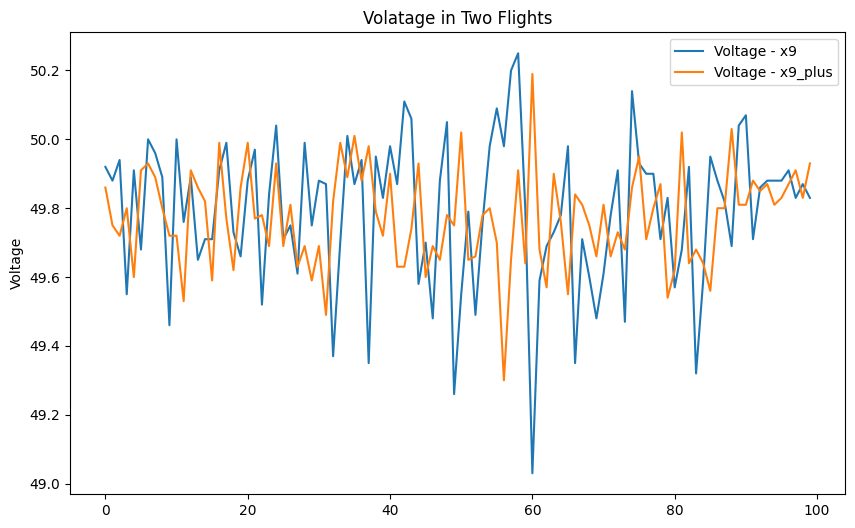

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x9['Voltage'], label='Voltage - x9')
plt.plot(x9_plus['Voltage'], label='Voltage - x9_plus')
plt.ylabel('Voltage')
plt.legend()
plt.title('Volatage in Two Flights')
plt.show()

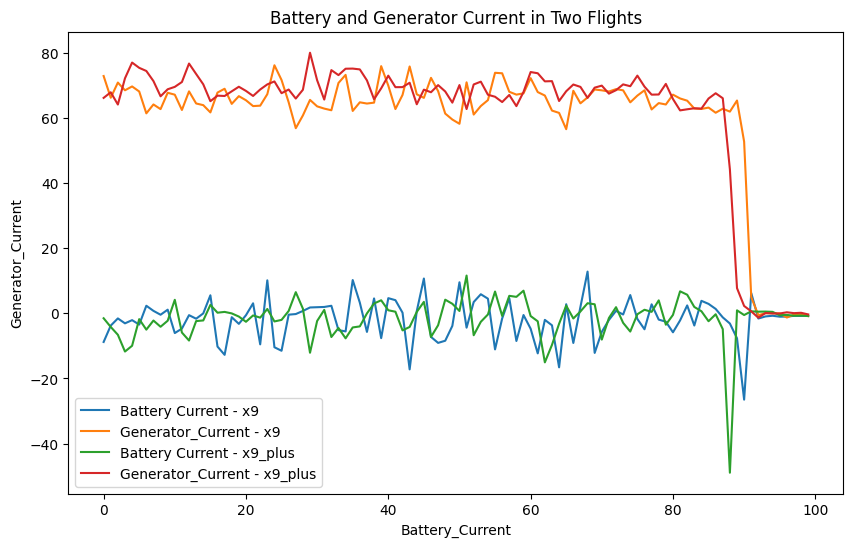

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x9['Battery Current'], label='Battery Current - x9')
plt.plot(x9['Generator_Current'], label='Generator_Current - x9')

# Plot 'Temp1' and 'Temp2' from the second DataFrame (x9_plus)
plt.plot(x9_plus['Battery Current'], label='Battery Current - x9_plus')
plt.plot(x9_plus['Generator_Current'], label='Generator_Current - x9_plus')

# Add labels and legend
plt.xlabel('Battery_Current')
plt.ylabel('Generator_Current')
plt.legend()
plt.title('Battery and Generator Current in Two Flights')
# Show the plot
plt.show()


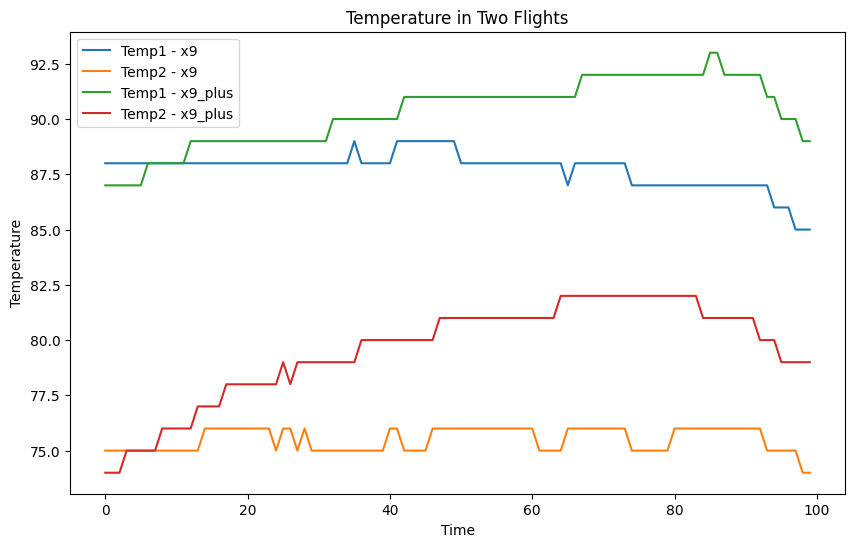

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x9['Temp1'], label='Temp1 - x9')
plt.plot(x9['Temp2'], label='Temp2 - x9')

# Plot 'Temp1' and 'Temp2' from the second DataFrame (x9_plus)
plt.plot(x9_plus['Temp1'], label='Temp1 - x9_plus')
plt.plot(x9_plus['Temp2'], label='Temp2 - x9_plus')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature in Two Flights')
# Show the plot
plt.show()


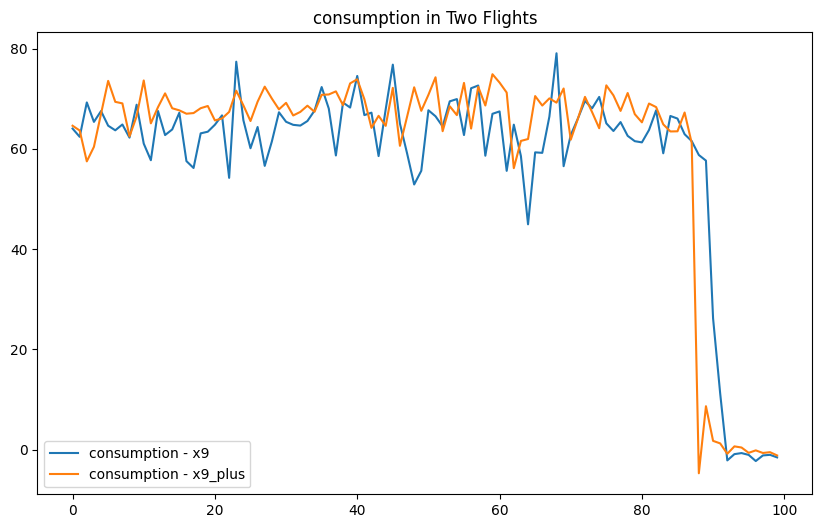

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x9['consumption'], label='consumption - x9')
plt.plot(x9_plus['consumption'], label='consumption - x9_plus')

# Add labels and legend
plt.legend()
plt.title('consumption in Two Flights')
# Show the plot
plt.show()

In [ ]:
x9.head()

,Temp1,Temp2,Generator_Current,Battery Current,servo angle,Voltage,Battery_Product,Gen_Product,consumption
0,88,75,72.84,-8.79,1300,49.92,-438.7968,3636.1728,-365.9568
1,88,75,66.17,-3.76,1300,49.88,-187.5488,3300.5596,-121.3788
2,88,75,70.83,-1.56,1300,49.94,-77.9064,3537.2502,-7.0764
3,88,75,68.46,-3.07,1300,49.55,-152.1185,3392.1930,-83.6585
4,88,75,69.64,-2.09,1300,49.91,-104.3119,3475.7324,-34.6719


In [ ]:
x9_plus.tail()

,Temp1,Temp2,Generator_Current,Battery Current,servo angle,Voltage,Battery_Product,Gen_Product,consumption
95,90,79,-0.05,-0.60,1300,49.83,-29.8980,-2.4915,-0.65
96,90,79,0.32,-0.48,1300,49.87,-23.9376,15.9584,-0.16
97,90,79,0.06,-0.74,1300,49.91,-36.9334,2.9946,-0.68
98,89,79,0.17,-0.69,1300,49.83,-34.3827,8.4711,-0.52
99,89,79,-0.33,-0.84,1300,49.93,-41.9412,-16.4769,-1.17


In [ ]:
x9_plus.head()

,Temp1,Temp2,Generator_Current,Battery Current,servo angle,Voltage,Battery_Product,Gen_Product,consumption
0,87,74,66.13,-1.51,1300,49.86,-75.2886,3297.2418,3221.9532
1,87,74,67.85,-4.18,1300,49.75,-207.9550,3375.5375,3167.5825
2,87,74,64.09,-6.58,1300,49.72,-327.1576,3186.5548,2859.3972
3,87,75,72.14,-11.73,1300,49.80,-584.1540,3592.5720,3008.4180
4,87,75,76.97,-9.95,1300,49.60,-493.5200,3817.7120,3324.1920
